### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#%matplotlib notebook
import time
pd.set_option("display.max_columns", 100)


### Importing Data

In [2]:
train = pd.read_csv("train_V2.csv")

test = pd.read_csv("test_V2.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
dtypes: float64(5), int64(19), object(4)
memory usage: 413.2+ MB


### Removing Null Values

In [3]:
train.dropna(inplace=True)

In [4]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### Removing ID columns

In [7]:
train_copy = train.iloc[:,3:]
test_copy = test.iloc[:,3:]

In [29]:
pd.Series(train.matchType.unique()).sort_values().reset_index() == pd.Series(test.matchType.unique()).sort_values().reset_index()

,index,0
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True
6,False,True
7,False,True
8,False,True
9,False,True


In [62]:
pd.Series(test.matchType.unique()).sort_values().reset_index()

,index,0
0,9,crashfpp
1,7,crashtpp
2,5,duo
3,1,duo-fpp
4,14,flarefpp
5,11,flaretpp
6,10,normal-duo
7,8,normal-duo-fpp
8,13,normal-solo
9,12,normal-solo-fpp


### Scaling

In [17]:
train_scale = train.copy()
#valid_scale = valid.copy()

In [21]:
train_scale.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0


In [19]:
train_scale = train_scale.iloc[:,3:]

non_scaling_cols = ['matchType', 'winPlacePerc']

train_scale.drop(non_scaling_cols, axis=1, inplace=True)

from sklearn import preprocessing

train_scaled = preprocessing.scale(train_scale, with_mean='True', with_std='False')

train_scaled = pd.DataFrame(train_scaled,index = train_scale.index, columns=train_scale.columns)

#valid_X_scaled = scaler.transform(valid_X)

train_scaled = train_scaled.join(train[non_scaling_cols])

### One Hot Encoding 

In [9]:
#train_copy = train_scaled

def getdummies(data, ohe_columns):
    data_dum = pd.get_dummies(data, columns = ohe_columns)
    return data_dum

ohe_columns = ['matchType']

train_copy = getdummies(train_copy, ohe_columns)

#### Another way of one hot encoding(longer)

train_copy = train
test_copy = test

def getdummies(data, feature):
    data_dum = pd.get_dummies(data[feature])
    data = data.join(data_dum)
    data.drop(feature, axis=1, inplace=True)
    return data

#one_hot_encoding columns
train_copy= getdummies(train_copy, 'matchType') 
#test_copy= getdummies(test_copy, 'matchType') 

In [27]:
test_copy= getdummies(test_copy, ['matchType']) 

### Separating into Predictors(X) and Labels(y)

In [12]:
train_X = train_copy.drop(['winPlacePerc'], axis=1)
train_y = train_copy['winPlacePerc']

#test_X = test_copy

In [87]:
(train_X.columns) == test_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [13]:
# train_copy.dropna(inplace=True)
train_copy.isnull().any().any()

False

### Splitting into Training and Validation Sets

In [14]:
#splitting into training and validation sets

from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y, test_size = 0.25, random_state=0)


In [15]:
print(train_X.shape,valid_X.shape, train_y.shape,  valid_y.shape)

(3335223, 40) (1111742, 40) (3335223,) (1111742,)


### Boruta

In [57]:
from boruta import boruta_py

from sklearn.ensemble import RandomForestRegressor

train_X_bor = train_X.values
train_y_bor = train_y.values

forest = RandomForestRegressor(n_jobs=-1, n_estimators=5)
 
# define Boruta feature selection method
feat_selector = boruta_py.BorutaPy(forest, n_estimators=5, verbose=2, max_iter = 50)

borutastart = time.time()
# find all relevant features
feat_selector.fit(train_X_bor, train_y_bor)
borutaend = time.time()

print("Boruta Complete. Runtime: {:.2f} mins.".format((borutaend-borutastart)/60))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	40
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	30
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	30
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	30
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	30
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	30
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	30
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	30
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	30
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	30
I

IndexError: tuple index out of range

In [63]:
# check selected features
feat_selector.support_

array([False,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [64]:
# check ranking of features
feat_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(train_X_bor)

In [ ]:
X_filtered = pd.DataFrame(X_filtered, columns= feat_selector.support_)

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

linregmodel= LinearRegression()

linregstart = time.time()
clf_linreg = linregmodel.fit(train_X, train_y)
linregend = time.time()

pred_linreg = clf_linreg.predict(valid_X)


In [19]:
#Calculating Metrics 

score_linreg = clf_linreg.score(valid_X, valid_y)
error_linreg = abs(valid_y-pred_linreg)

print("The Linear Regression Model took {:.2f} mins to run. The Model score is: {:.4f} and the Mean Average Error is {:.4f}".format((linregend-linregstart)/60,  score_linreg, np.mean(error_linreg)))


The Linear Regression Model took 0.09 mins to run. The Model score is: 0.8393 and the Mean Average Error is 0.0899


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

rfmodel = RandomForestRegressor(n_estimators = 50, n_jobs=-1, random_state=0)

rfstart = time.time()
clf_rf = rfmodel.fit(train_X, train_y)
rfend = time.time()

pred_rf = clf_rf.predict(valid_X)


In [48]:
#Calculating Evaluating Metrics

score_rf = clf_rf.score(valid_X, valid_y)

error_rf = abs(valid_y-pred_rf)

print("The Random Forest Score Model took {:.2f} mins to run. The Model score is: {:.4f} and the Mean Average Error is {:.4f}".format((rfend-rfstart)/60,  score_rf, np.mean(error_rf)))


The Random Forest Score Model took 11.78 mins to run. The Model score is: 0.9286 and the Mean Average Error is 0.0582


In [164]:
print(clf_rf.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


In [45]:
#getting variable importance
importances_rf = pd.DataFrame(clf_rf.feature_importances_, index = train_X.columns, columns=['importance']).sort_values('importance',ascending=False)

importances_rf

,importance
walkDistance,0.697589
killPlace,0.181235
matchDuration,0.017781
numGroups,0.016934
maxPlace,0.013372
rideDistance,0.007461
kills,0.007257
damageDealt,0.007172
boosts,0.006068
rankPoints,0.005727


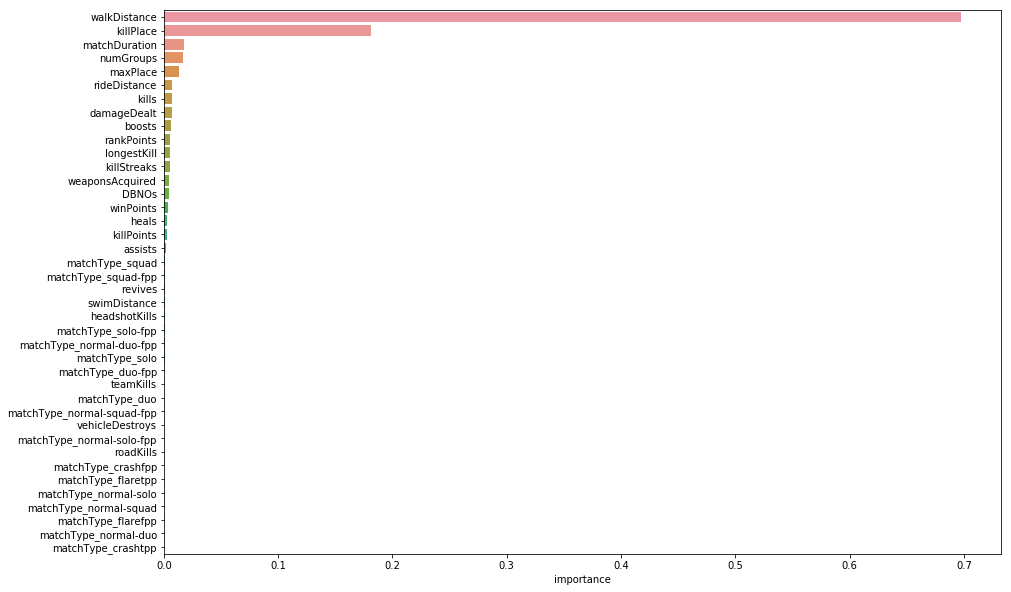

In [46]:
#plotting importance plot
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='importance', y=importances_rf.index, data=importances_rf, ax=ax)
plt.show()

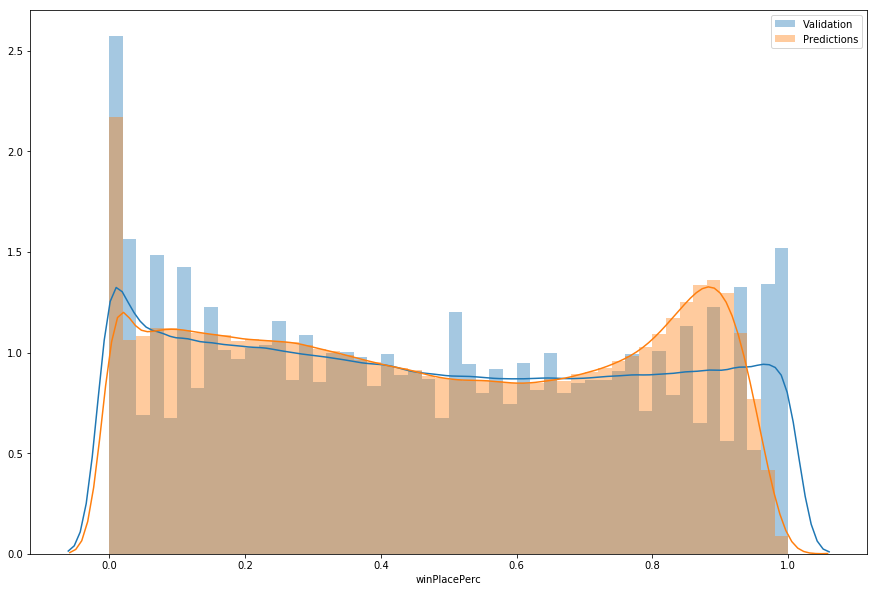

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(valid_y,label="Validation", ax=ax)
sns.distplot(pred_rf,label="Predictions", ax=ax)

plt.legend()
plt.show()

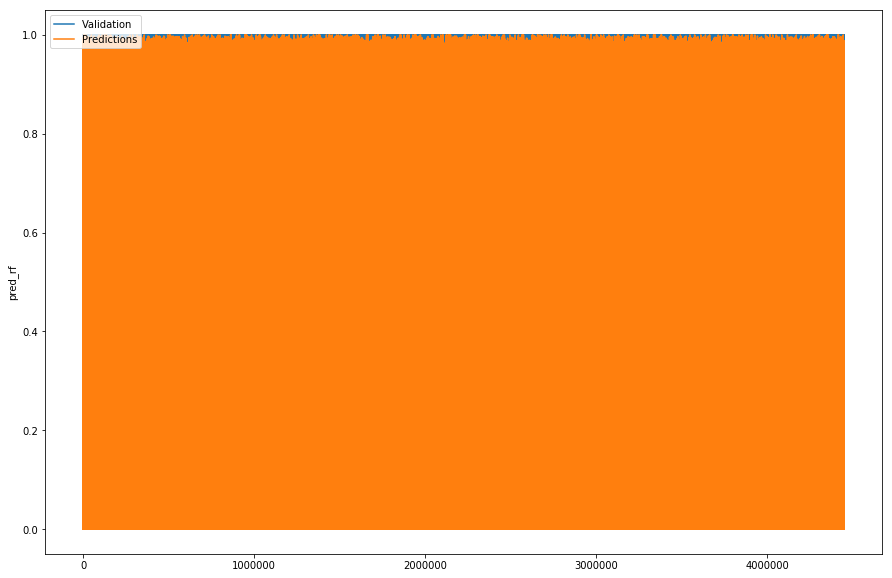

In [226]:
fig, ax = plt.subplots(figsize=(15,10))

sns.lineplot(x=pred_rf_df.index,y="validation", data=pred_rf_df, label="Validation", ax=ax)
sns.lineplot(x=pred_rf_df.index,y="pred_rf", data=pred_rf_df, label="Predictions", ax=ax)

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

sns.pointplot(x=pred_rf_df.index,y="validation", data=pred_rf_df, label="Validation", ax=ax[0])
sns.pointplot(x=pred_rf_df.index,y="pred_rf", data=pred_rf_df, label="Predictions", ax=ax[1])

plt.legend()
plt.show()

In [217]:
pred_rf_df = pd.DataFrame(pred_rf, index= valid_y.index, columns = ["pred_rf"])

pred_rf_df['validation'] = valid_y.values

In [224]:
pred_rf_df.sort_values('validation', ascending=True, inplace=True)

### GBM 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

start_gbm = time.time()

gbmmodel = GradientBoostingRegressor(random_state=0)

clf_gbm = gbmmodel.fit(train_X, train_y)

end_gbm = time.time()

pred_gbm = clf_gbm.predict(valid_X)

In [28]:
score_gbm = clf_gbm.score(valid_X, valid_y)

#Calculating Mean Absolute Error

error_gbm = abs(valid_y-pred_gbm)


In [40]:
print("The GBM Model took {:.2f} mins to run. The Model score is: {:.4f} and the Mean Average Error is {:.4f}".format((start_gbm-end_gbm)/60,  score_gbm, np.mean(error_gbm)))


Score of GBM: 0.8990. Runtime: 15.48 mins


In [32]:
importances_gbm = pd.DataFrame(clf_gbm.feature_importances_, index = train_X.columns, columns=['importance_gbm']).sort_values('importance_gbm',ascending=False)

importances_gbm

,importance_gbm
walkDistance,0.248246
killPlace,0.246053
numGroups,0.091633
kills,0.078070
killStreaks,0.062041
matchDuration,0.054933
maxPlace,0.046102
rideDistance,0.038643
boosts,0.030683
assists,0.021635


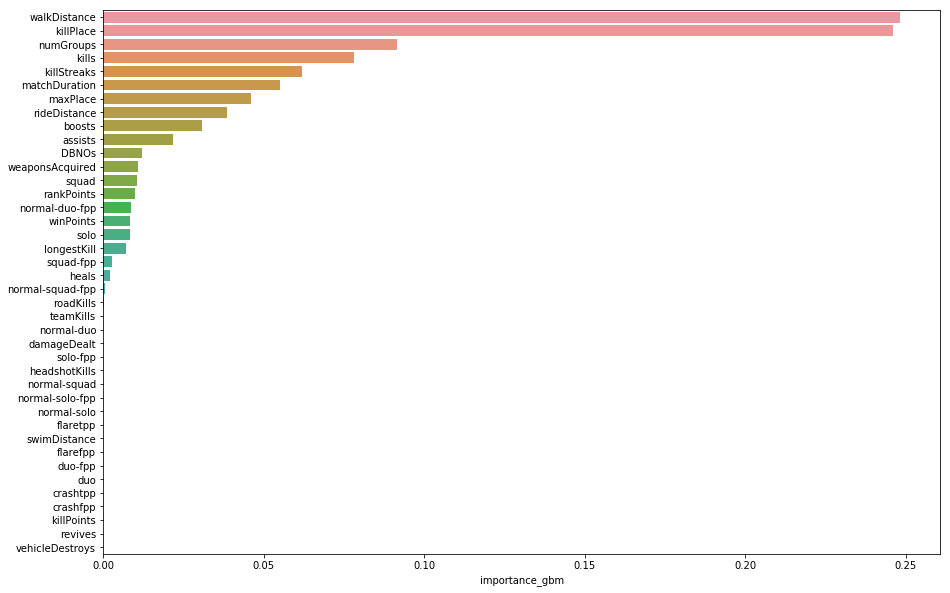

In [34]:
#plotting importance plot for GBM
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='importance_gbm', y=importances_gbm.index, data=importances_gbm, ax=ax).set_title("GBM Variable Importance")
#plt.title()
plt.show()

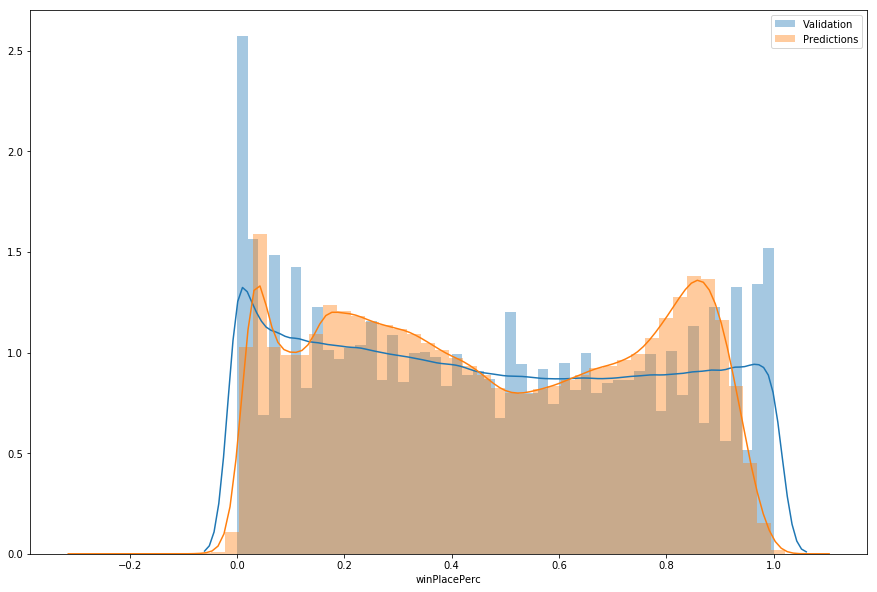

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

sns.distplot(valid_y,label="Validation", ax=ax)
sns.distplot(pred_gbm,label="Predictions", ax=ax)

plt.legend()
plt.show()

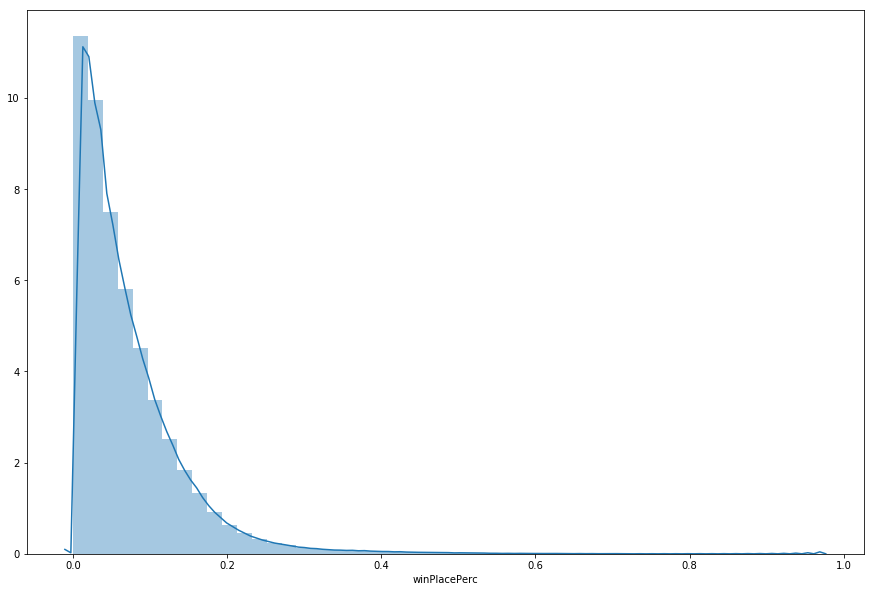

In [60]:
fig, ax = plt.subplots(figsize = (15,10))

sns.distplot(error_gbm, ax=ax)
plt.show()